In [27]:
# Install require package
!pip install numpy pandas matplotlib scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 3.7 MB/s eta 0:00:0000:0100:01
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 611.4 kB/s eta 0:00:0000:0100:02


# Tạo 03 bộ dữ liệu D1, D2, D3. Mỗi bộ dữ liệu có 1 tập train gồm 10 điểm dữ liệu và 1 tập test gồm 10 điểm dữ liệu. Các điểm dữ liệu (x,y) có giá trị input x được phát sinh ngẫu nhiên trong khoảng [0,1], và giá trị target y = f(x)=sin(1+x^2)+ε với ε tuân theo phân phối chuẩn N(0,σ=0.03) như trong trang 58 của slides. Lưu ý σ=0.03 là độ lệch chuẩn (standard deviation).

In [47]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


seed = 220202022
np.random.seed(seed)


# Parameters
num_datasets = 3
num_points = 10
sigma = 0.03



In [48]:
# Define the function to generate y values with noise
def generate_dataset():
    # Generate input values x in the range [0, 1]
    x_train = np.random.uniform(0, 1, num_points)
    x_test = np.random.uniform(0, 1, num_points)
    
    # Generate noise ε from normal distribution N(0, σ)
    noise_train = np.random.normal(0, sigma, num_points)
    noise_test = np.random.normal(0, sigma, num_points)
    
    # Calculate target values y = sin(1 + x^2) + ε
    y_train = np.sin(1 + x_train**2) + noise_train
    y_test = np.sin(1 + x_test**2) + noise_test
    
    return (x_train, y_train), (x_test, y_test)

def plot_datasets(datasets):
    fig, axes = plt.subplots(1, num_datasets, figsize=(15, 5))
    
    for i, dataset in enumerate(datasets):
        train_set, test_set = dataset['train'], dataset['test']
        
        axes[i].scatter(train_set[0], train_set[1], color='blue', label='Train')
        axes[i].scatter(test_set[0], test_set[1], color='red', label='Test')
        axes[i].set_title(f"Dataset {i+1}")
        axes[i].set_xlabel('x')
        axes[i].set_ylabel('y')
        axes[i].legend()
    
    plt.tight_layout()
    plt.show()

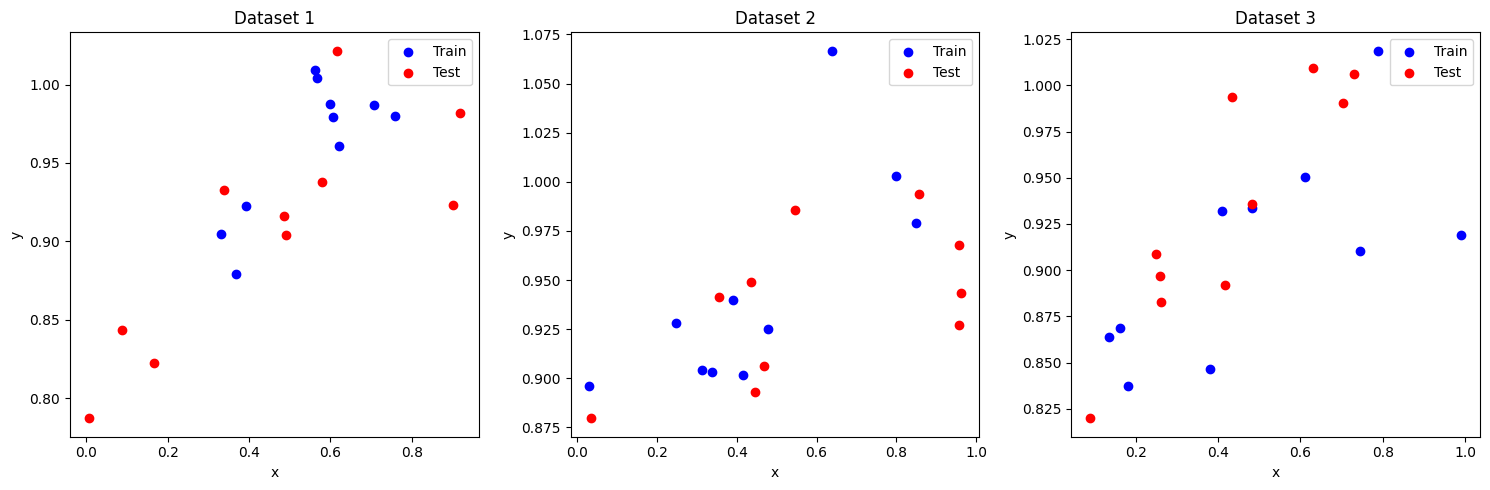

In [49]:
datasets = []

for _ in range(num_datasets):
    train_set, test_set = generate_dataset()
    datasets.append({'train': train_set, 'test': test_set})

plot_datasets(datasets)

# Với mỗi bộ dữ liệu, ta sử dụng tập train để huấn luyện 9 mô hình polynomial regression có bậc (degree) từ 1-9 như trong trang 65 của slides. Sau đó, hãy tính E_in (trên tập train) và E_out (trên tập test) cho từng mô hình đã huấn luyện được, và tạo bảng kết quả như trong trang 66 của slides.

In [50]:
def calculate_errors_and_create_table(datasets, max_degree=9):
    results = []

    for i, dataset in enumerate(datasets):
        train_set, test_set = dataset['train'], dataset['test']
        x_train, y_train = train_set
        x_test, y_test = test_set
        
        error_results = []

        for degree in range(1, max_degree + 1):
            poly = PolynomialFeatures(degree)
            
            # Transform the data to include polynomial features
            x_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
            x_test_poly = poly.transform(x_test.reshape(-1, 1))
            
            # Train the model
            model = LinearRegression()
            model.fit(x_train_poly, y_train)
            
            # Predict and calculate errors
            y_train_pred = model.predict(x_train_poly)
            y_test_pred = model.predict(x_test_poly)
            
            E_in = mean_squared_error(y_train, y_train_pred)
            E_out = mean_squared_error(y_test, y_test_pred)
            
            error_results.append((degree, round(E_in, 5), round(E_out, 5)))
        
        # Create DataFrame for better visualization
        df = pd.DataFrame(error_results, columns=['Degree', 'E_in', 'E_out'])
        results.append((i + 1, df))
        
    return results

In [51]:
def plot_polynomial_fits(datasets, max_degree=9):
    for i, dataset in enumerate(datasets):
        train_set, test_set = dataset['train'], dataset['test']
        x_train, y_train = train_set
        x_test, y_test = test_set

        plt.figure(figsize=(12, 8))
        plt.scatter(x_train, y_train, color='blue', label='Train', alpha=0.7)
        plt.scatter(x_test, y_test, color='red', label='Test', alpha=0.7)

        x_range = np.linspace(0, 1, 100).reshape(-1, 1)

        for degree in range(1, max_degree + 1):
            model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
            model.fit(x_train.reshape(-1, 1), y_train)

            y_range_pred = model.predict(x_range)

            plt.plot(x_range, y_range_pred, label=f'Degree {degree}')

        plt.title(f"Polynomial Fits for Dataset {i+1}")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim(-1.5, 2)  # Adjust the y-axis limits for better visualization
        plt.legend()
        plt.show()

Dataset 1:

   Degree     E_in         E_out
0       1  0.00067  2.990000e-03
1       2  0.00033  1.156000e-02
2       3  0.00033  9.880000e-03
3       4  0.00021  1.520950e+00
4       5  0.00002  1.737349e+02
5       6  0.00001  4.866135e+02
6       7  0.00000  5.049198e+04
7       8  0.00000  7.769530e+06
8       9  0.00000  7.545380e+09

--------------------------------------------------

Dataset 2:

   Degree     E_in         E_out
0       1  0.00128       0.00256
1       2  0.00127       0.00299
2       3  0.00080       0.00153
3       4  0.00035       0.03632
4       5  0.00024       0.00081
5       6  0.00015       0.07397
6       7  0.00008       2.39264
7       8  0.00007      66.73571
8       9  0.00000  151645.76282

--------------------------------------------------

Dataset 3:

   Degree     E_in    E_out
0       1  0.00149  0.00265
1       2  0.00121  0.00174
2       3  0.00097  0.00196
3       4  0.00096  0.00237
4       5  0.00082  0.00601
5       6  0.00032  0.00735
6 

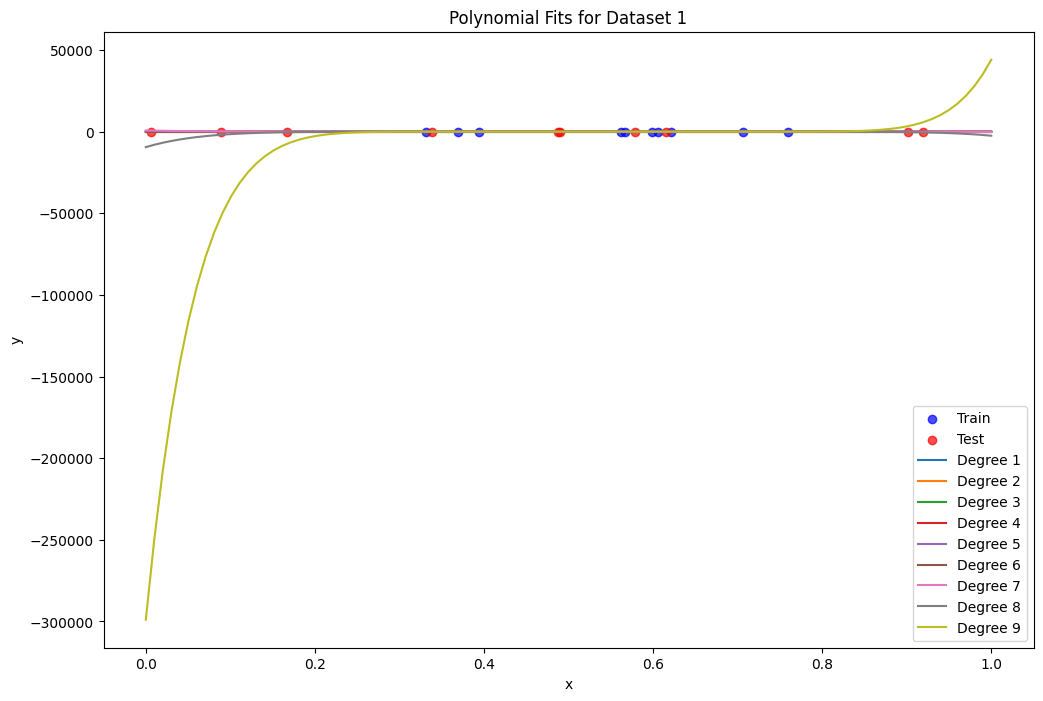

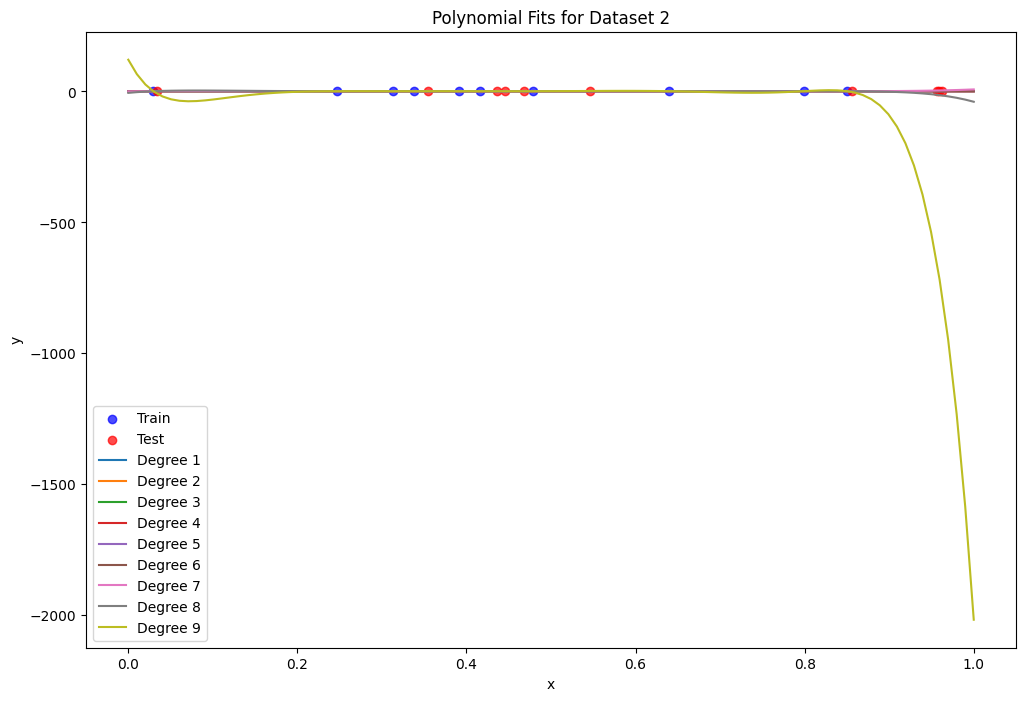

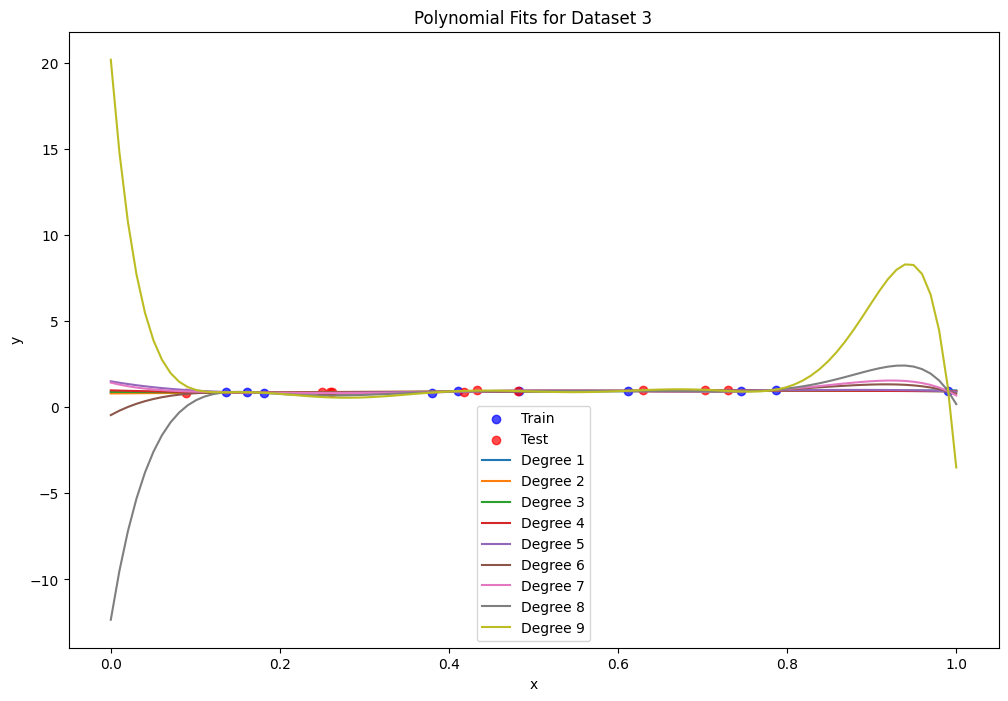

In [53]:
results = calculate_errors_and_create_table(datasets)
for dataset_num, df in results:
    print(f"Dataset {dataset_num}:\n")
    print(df)
    print("\n" + "-"*50 + "\n")

# Plot polynomial fits
plot_polynomial_fits(datasets)